In [1]:
using DataFrames
using Gadfly
using Cairo
using Compose
using Colors
using Measures
set_default_plot_size(40cm, 14cm)

home = "/home/german/labo/18/egfr/rg/"
home_gram = "/home/german/labo/18/egfr/renonmis_gram/"
home_modos = "/home/german/labo/18/egfr/modos/"
home_rtdos = "/home/german/labo/18/egfr/rtdos_log/"
home_plots = "/home/german/labo/18/egfr/rtdos_log/plots/"
aa = 277
aa_3 = 277 * 3
aa_36 = aa_3 - 6

825

# Bfactor

In [2]:
tmp = readdlm(string(home_rtdos, "mean_bfacs_im"))
mean_bfacs_im = reshape(tmp, length(tmp))

tmp = readdlm(string(home_rtdos, "mean_bfacs_am"))
mean_bfacs_am = reshape(tmp, length(tmp))

df_mean_bfacs = DataFrame(Value = [mean_bfacs_im ./ mean_bfacs_im[1] ; mean_bfacs_am ./ mean_bfacs_am[1]],
    Modes = [ collect(1:aa_36) ; collect(1:aa_36) ],
    Conformer = [ fill("IM", length(mean_bfacs_im)) ; fill("AM", length(mean_bfacs_am)) ]);

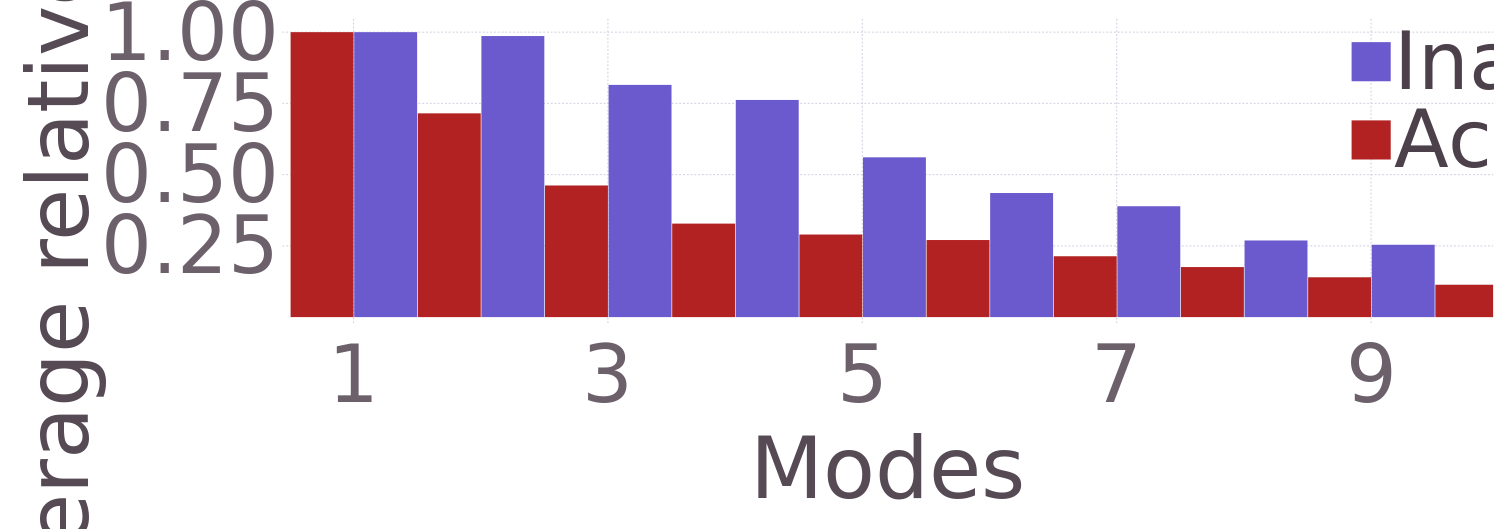

In [3]:
pdf_mean_bfacs = plot(df_mean_bfacs, x="Modes", y="Value", color = "Conformer", 
    Geom.bar(position = :dodge),

    Guide.ylabel("Average relative value", orientation=:vertical), 
    Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    Guide.xticks(ticks = collect(1:2:10), orientation = :horizontal),
    Coord.cartesian(xmin = 0.5, xmax = 9.9, ymax = 1.02),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.88w, -0.36h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, key_position = :right,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

# Bfactor correlación

In [4]:
tmp = readdlm(string(home_rtdos, "cor_bf_im"))
cor_bf_im = reshape(tmp, length(tmp))
cor_bf_im = cor_bf_im[cor_bf_im .!= 0];

tmp = readdlm(string(home_rtdos, "cor_bf_am"))
cor_bf_am = reshape(tmp, length(tmp))
cor_bf_am = cor_bf_am[cor_bf_am .!= 0];

df_cor_bf = DataFrame(ρB = [cor_bf_im ; cor_bf_am],
    Conformer = [ fill("IM", length(cor_bf_im)) ; fill("AM", length(cor_bf_am)) ]);

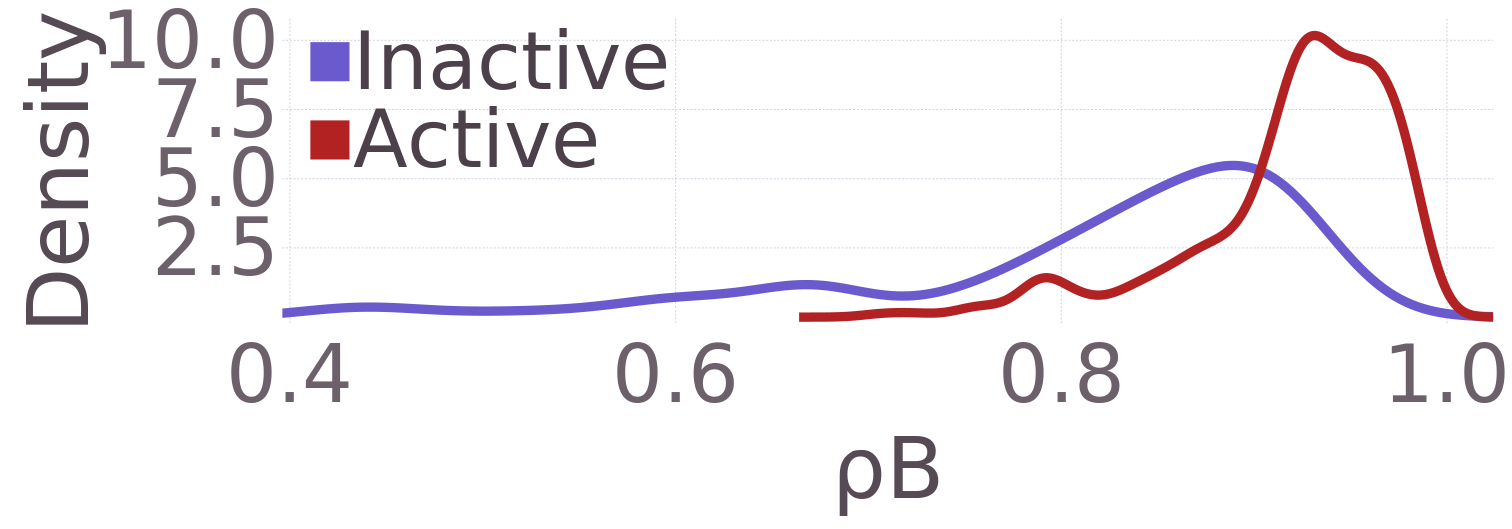

In [5]:
pdf_cor_bf = plot(df_cor_bf, x="ρB", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.yticks(ticks = collect(2.5:2.5:10), orientation = :horizontal),
    Coord.cartesian(xmin = 0.4, xmax = 1.02, ymax = 10.5),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.02w, -0.36h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

# Pnumber

In [6]:
# 1
tmp = readdlm(string(home_rtdos, "pnu_im_1"))
pnu_new_modos_im_1 = reshape(tmp, length(tmp))
# 2
tmp = readdlm(string(home_rtdos, "pnu_im_2"))
pnu_new_modos_im_2 = reshape(tmp, length(tmp))

# 1
tmp = readdlm(string(home_rtdos, "pnu_am_1"))
pnu_new_modos_am_1 = reshape(tmp, length(tmp))
# 2
tmp = readdlm(string(home_rtdos, "pnu_am_2"))
pnu_new_modos_am_2 = reshape(tmp, length(tmp));

df_pnu_im = DataFrame(Pk = [pnu_new_modos_im_1 ; pnu_new_modos_im_2],
    Conformer = [ fill("1", length(pnu_new_modos_im_1)) ; fill("2", length(pnu_new_modos_im_1)) ]);

df_pnu_am = DataFrame(Pk = [pnu_new_modos_am_1 ; pnu_new_modos_am_2],
    Conformer = [ fill("1", length(pnu_new_modos_am_2)) ; fill("2", length(pnu_new_modos_am_2)) ]);

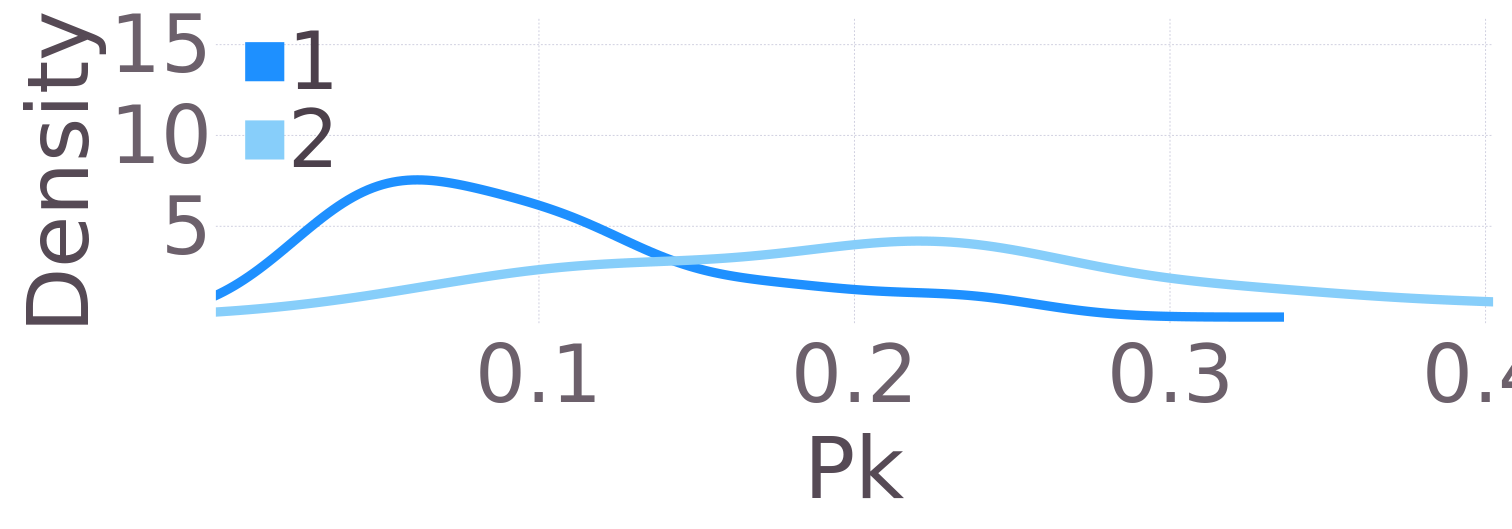

In [7]:
pdf_pnu_im = plot(df_pnu_im, x="Pk", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.yticks(ticks = collect(5:5:15), orientation = :horizontal),
    Guide.xticks(ticks = collect(0.1:0.1:0.4), orientation = :horizontal),
    Coord.cartesian(xmin = 0., xmax = 0.4, ymax = 16),
    Scale.color_discrete_manual("DodgerBlue", "LightSkyBlue"),
    Guide.colorkey(title="Conformer", pos=[0.02w, -0.36h], labels = ["1", "2"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

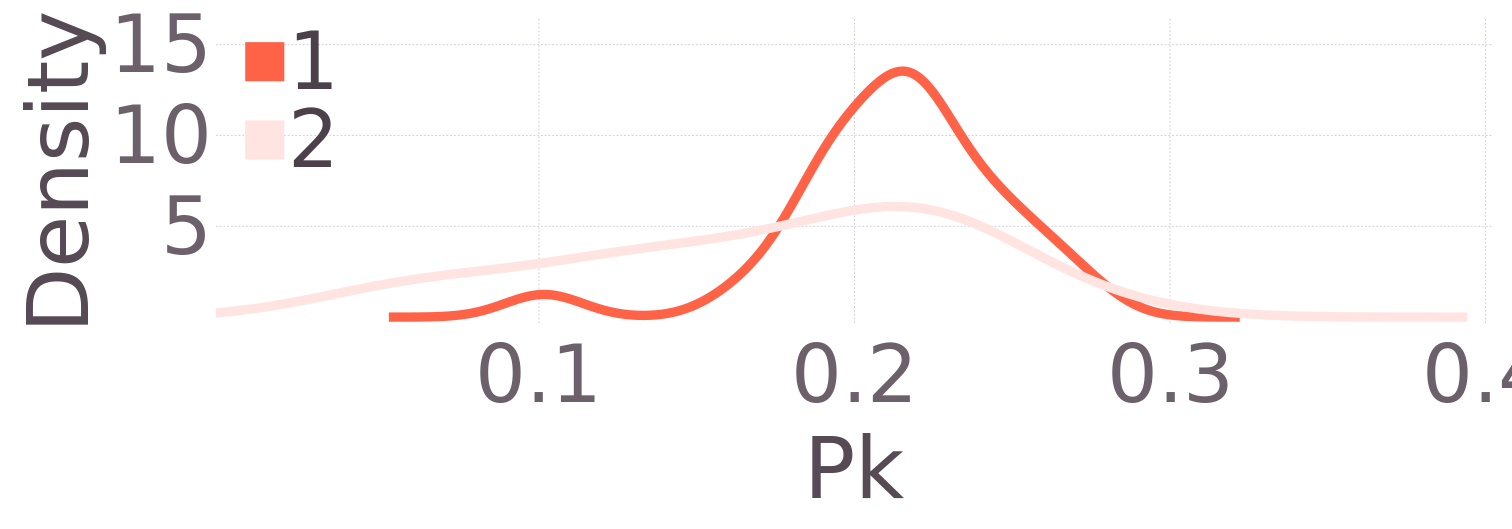

In [8]:
pdf_pnu_am = plot(df_pnu_am, x="Pk", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.yticks(ticks = collect(5:5:15), orientation = :horizontal),
    Guide.xticks(ticks = collect(0.1:0.1:0.4), orientation = :horizontal),
    Coord.cartesian(xmin = 0., xmax = 0.4, ymax = 16),
    Scale.color_discrete_manual("Tomato", "MistyRose"),
    Guide.colorkey(title="Conformer", pos=[0.02w, -0.36h], labels = ["1", "2"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

# Zeta y ND

In [9]:
# IM
tmp = readdlm(string(home_rtdos, "zeta_im"))[2:end, :]
zeta_im = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "nd_im"))[2:end, :]
nd_im = reshape(tmp, length(tmp))

# AM
tmp = readdlm(string(home_rtdos, "zeta_am"))[2:end, :]
zeta_am = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "nd_am"))[2:end, :]
nd_am = reshape(tmp, length(tmp))

df_zeta = DataFrame(ζ = [zeta_im .* 100000 ; zeta_am .* 100000 ],
    Conformer = [ fill("IM", length(zeta_im)) ; fill("AM", length(zeta_am)) ]);

df_nd = DataFrame(ND = [nd_im ; nd_am],
    Conformer = [ fill("IM", length(zeta_im)) ; fill("AM", length(zeta_am)) ]);

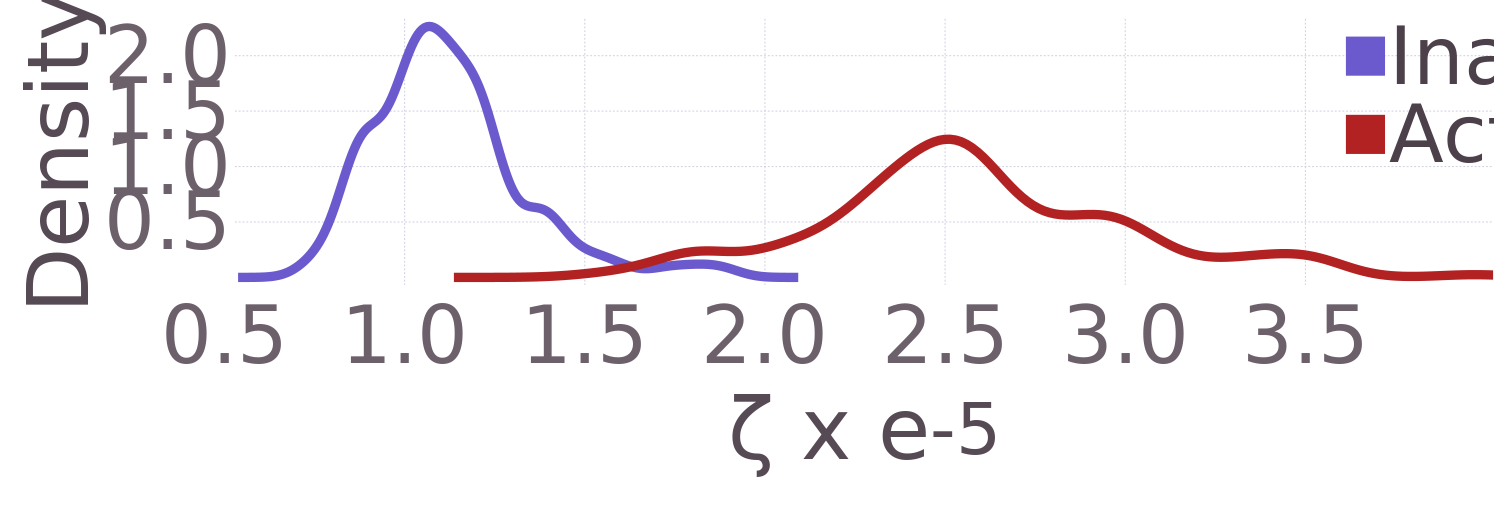

In [10]:
pdf_zeta = plot(df_zeta, x="ζ", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.xlabel("ζ x e<sup>-5</sup>", orientation=:horizontal), 
    Guide.yticks(ticks = collect(0.5:0.5:2), orientation = :horizontal),
    Guide.xticks(ticks = collect(0.5:0.5:3.5), orientation = :horizontal),
    
    Coord.cartesian(xmin = 0.55, xmax = 4),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.88w, -0.36h], labels = ["Inactive", "Active"]),


    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

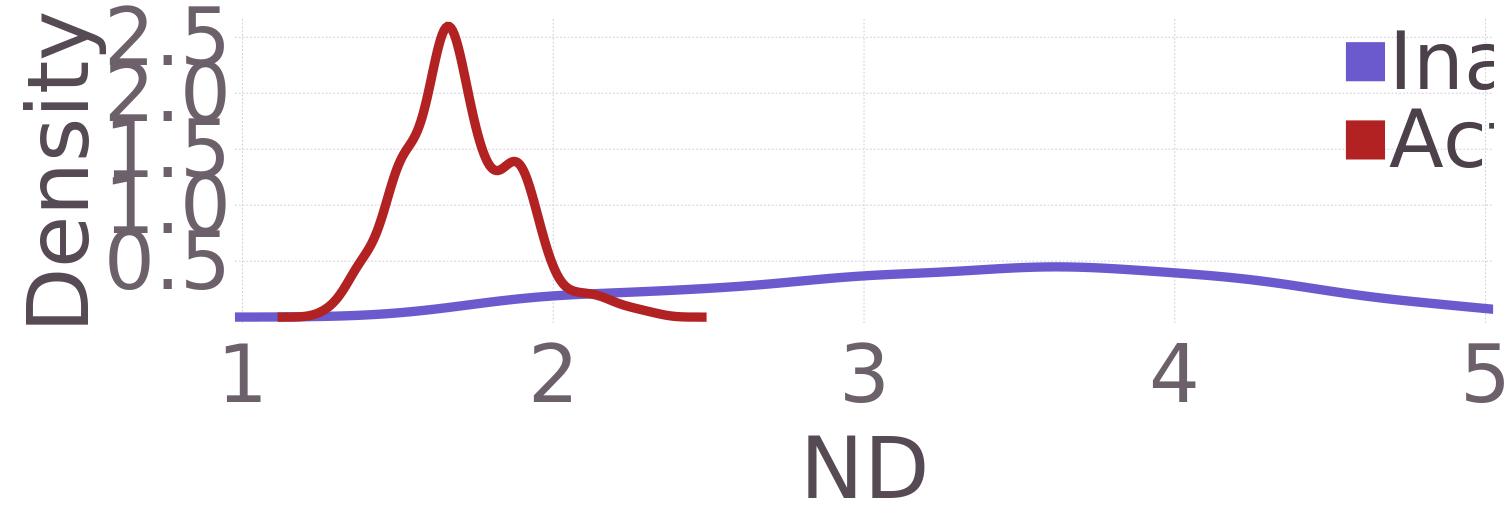

In [11]:
pdf_nd = plot(df_nd, x="ND", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.xticks(ticks = collect(1:1:5), orientation = :horizontal),
    Guide.yticks(ticks = collect(0.5:0.5:2.5), orientation = :horizontal),
    Coord.cartesian(xmin = 1.0, xmax = 5.0),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.88w, -0.36h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

# SVD

In [12]:
# IM
tmp = readdlm(string(home_rtdos, "dots_svd_im_1"))[2:end, :]
dots_svd_im_1 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "dots_svd_im_2"))[2:end, :]
dots_svd_im_2 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "dots_svd_im_3"))[2:end, :]
dots_svd_im_3 = reshape(tmp, length(tmp))

# AM
tmp = readdlm(string(home_rtdos, "dots_svd_am_1"))[2:end, :]
dots_svd_am_1 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "dots_svd_am_2"))[2:end, :]
dots_svd_am_2 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "dots_svd_am_3"))[2:end, :]
dots_svd_am_3 = reshape(tmp, length(tmp))


df_svd_1 = DataFrame(Overlap = [dots_svd_im_1 ; dots_svd_am_1],
    Conformer = [ fill("IM", length(dots_svd_im_1)) ; fill("AM", length(dots_svd_am_1)) ])

df_svd_2 = DataFrame(Overlap = [dots_svd_im_2 ; dots_svd_am_2],
    Conformer = [ fill("IM", length(dots_svd_im_2)) ; fill("AM", length(dots_svd_am_2)) ])

df_svd_3 = DataFrame(Overlap = [dots_svd_im_3 ; dots_svd_am_3],
    Conformer = [ fill("IM", length(dots_svd_im_3)) ; fill("AM", length(dots_svd_am_3)) ]);

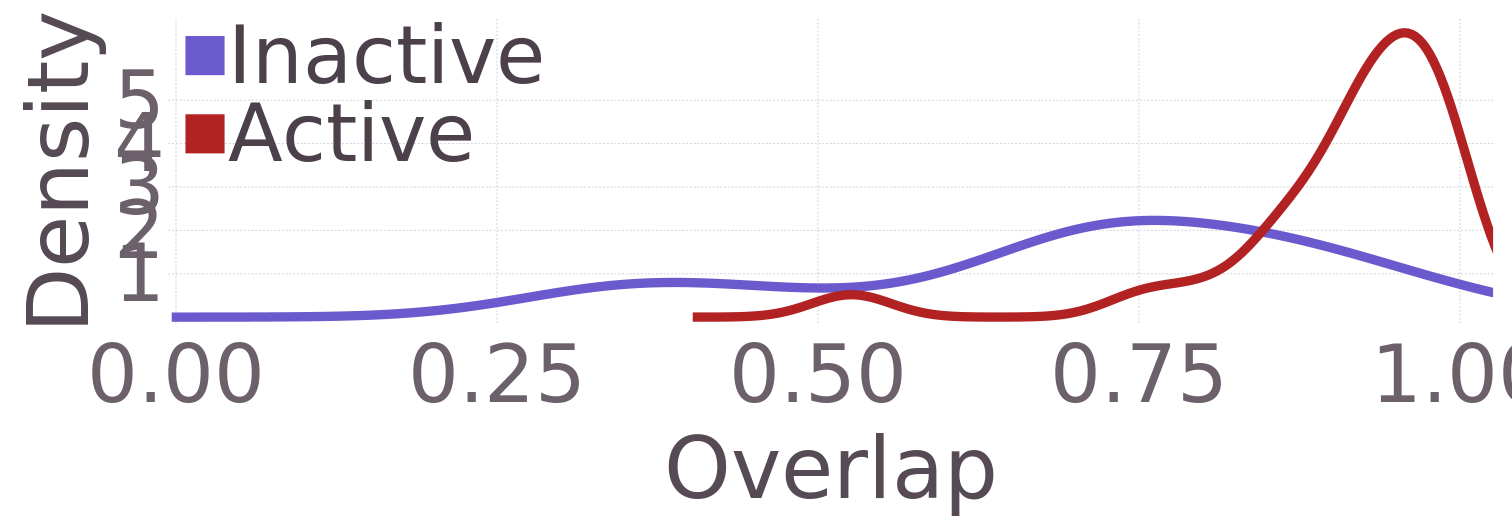

In [13]:
pdf_svd_1 = plot(df_svd_1, x="Overlap", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.xticks(ticks = collect(0.:0.25:1), orientation = :horizontal),
    Guide.yticks(ticks = collect(1:1:5), orientation = :horizontal),
    Coord.cartesian(xmin = 0, xmax = 1.02, ymax = 6.7),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.01w, -0.38h], labels = ["Inactive", "Active"]),


    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

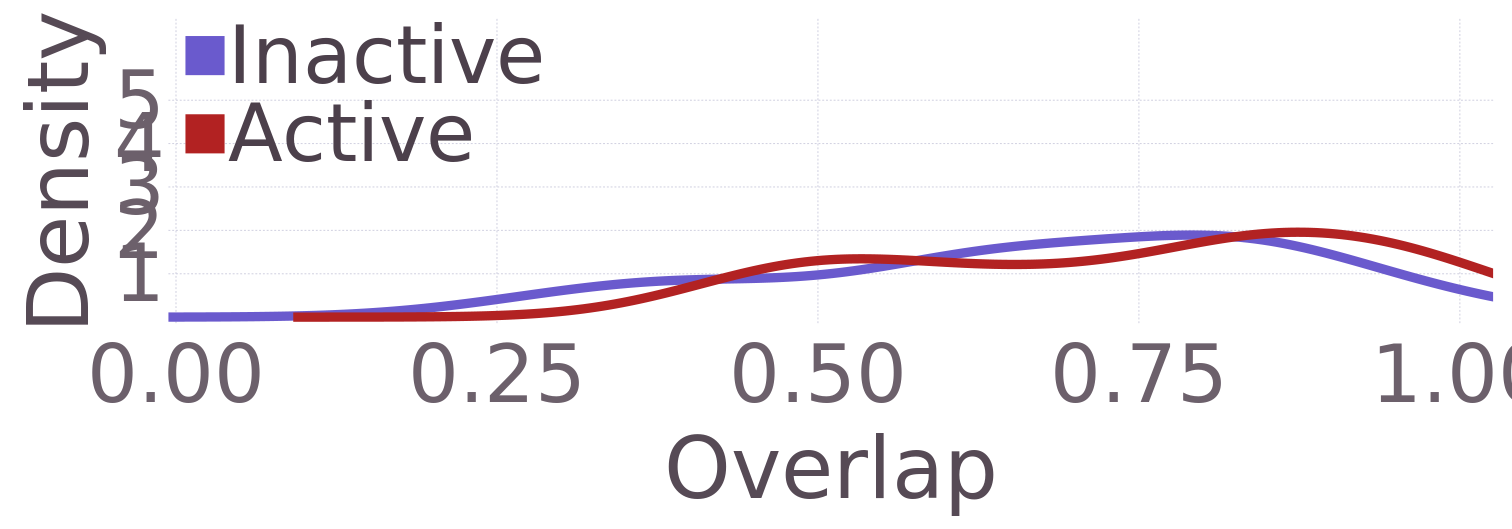

In [14]:
pdf_svd_2 = plot(df_svd_2, x="Overlap", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.xticks(ticks = collect(0.:0.25:1), orientation = :horizontal),
    Guide.yticks(ticks = collect(1:1:5), orientation = :horizontal),
    Coord.cartesian(xmin = 0, xmax = 1.02, ymax = 6.7),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.01w, -0.38h], labels = ["Inactive", "Active"]),
    
    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

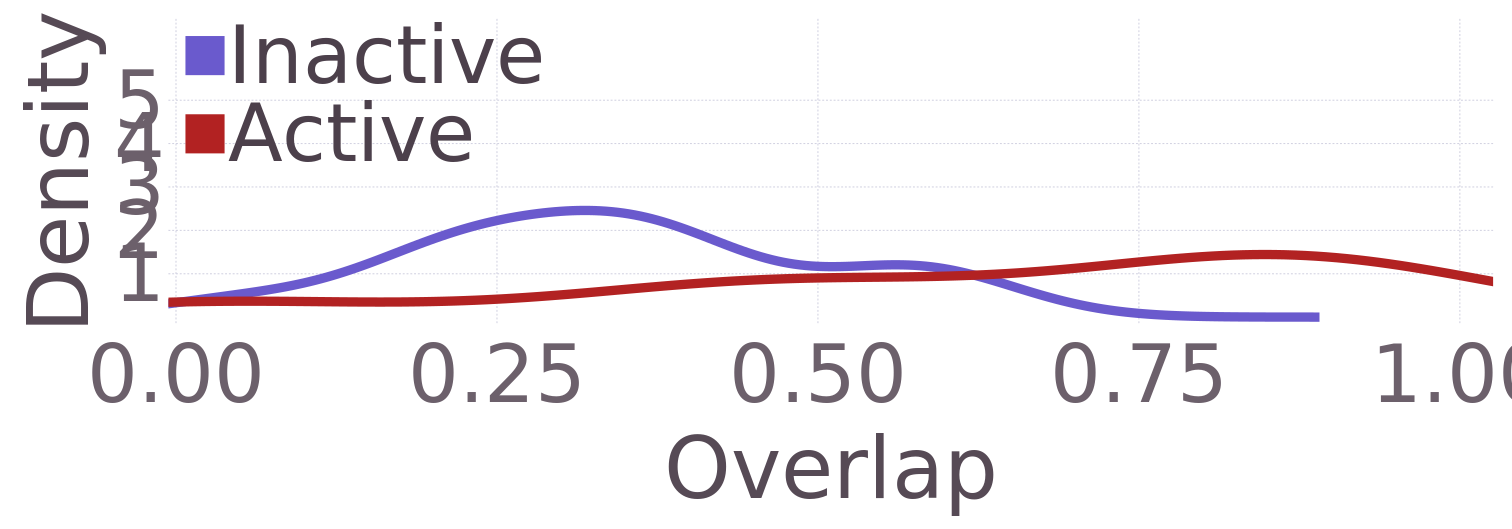

In [15]:
pdf_svd_3 = plot(df_svd_3, x="Overlap", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.xticks(ticks = collect(0.:0.25:1), orientation = :horizontal),
    Guide.yticks(ticks = collect(1:1:5), orientation = :horizontal),
    Coord.cartesian(xmin = 0, xmax = 1.02, ymax = 6.7),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.01w, -0.38h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

# Radio de giro

In [16]:
tmp = readdlm(string(home_rtdos, "rg_im_vec1"))
der_im_vec1 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "rg_am_vec1"))
der_am_vec1 = reshape(tmp, length(tmp))

tmp = readdlm(string(home_rtdos, "rg_im_vec2"))
der_im_vec2 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "rg_am_vec2"))
der_am_vec2 = reshape(tmp, length(tmp))


df_der_vec1 = DataFrame(ΔRg = [der_im_vec1 ; der_am_vec1],
    Conformer = [ fill("IM", length(der_im_vec1)) ; fill("AM", length(der_am_vec1)) ])

df_der_vec2 = DataFrame(ΔRg = [der_im_vec2 ; der_am_vec2],
    Conformer = [ fill("IM", length(der_im_vec2)) ; fill("AM", length(der_am_vec2)) ]);

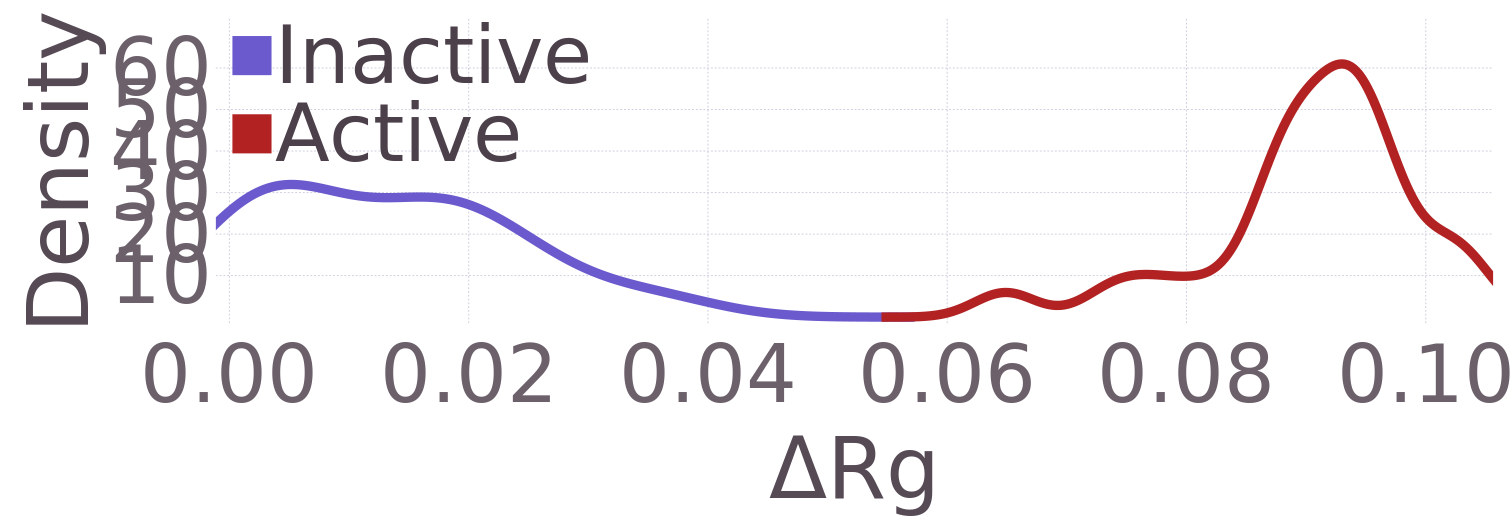

In [17]:
pdf_der_vec1 = plot(df_der_vec1, x="ΔRg", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.yticks(ticks = collect(10.:10:60), orientation = :horizontal),
    Guide.xticks(ticks = collect(0.:0.02:0.1), orientation = :horizontal),
    Coord.cartesian(xmin = -0.0005, xmax = 0.105, ymax = 70),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.01w, -0.38h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

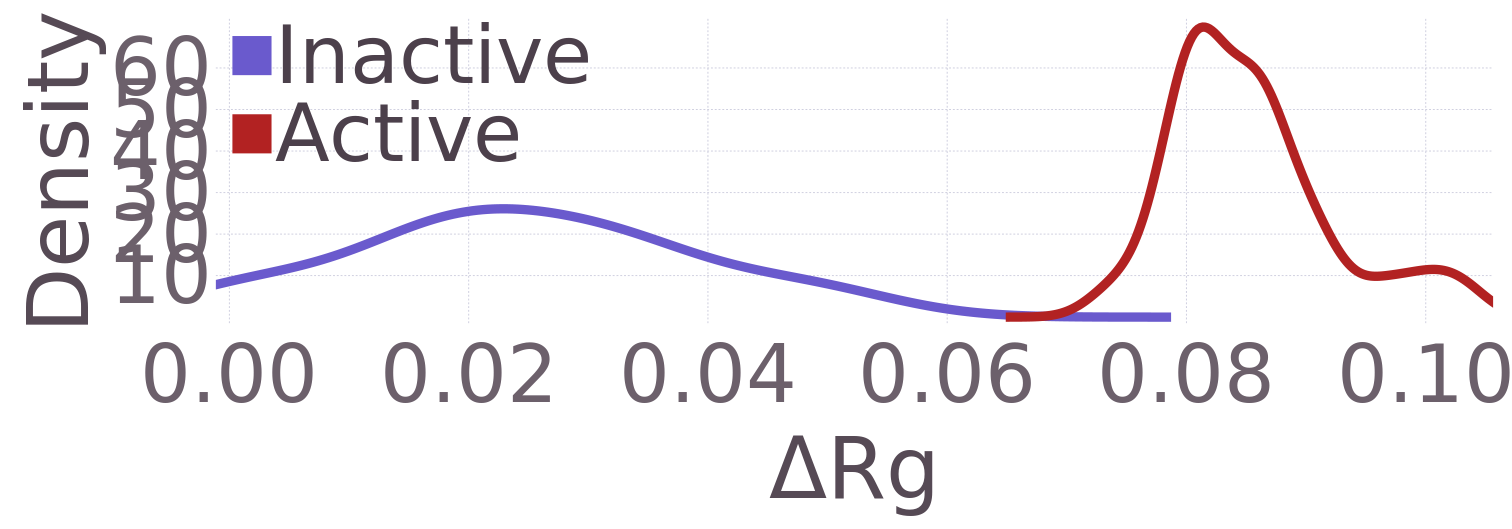

In [18]:
pdf_der_vec2 = plot(df_der_vec2, x="ΔRg", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.yticks(ticks = collect(10:10:60), orientation = :horizontal),
    Guide.xticks(ticks = collect(0.:0.02:0.1), orientation = :horizontal),
    Coord.cartesian(xmin = -0.0005, xmax = 0.105, ymax = 70),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.01w, -0.38h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

## Hueco

### 1er método

In [34]:
tmp = readdlm(string(home_rtdos, "arr_vol_im"))
arr_vol_im = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "arr_vol_am"))
arr_vol_am = reshape(tmp, length(tmp))

df_arr_vol = DataFrame(ΔVol = [arr_vol_im ; arr_vol_am],
    Conformer = [ fill("IM", length(arr_vol_im)) ; fill("AM", length(arr_vol_am)) ]);

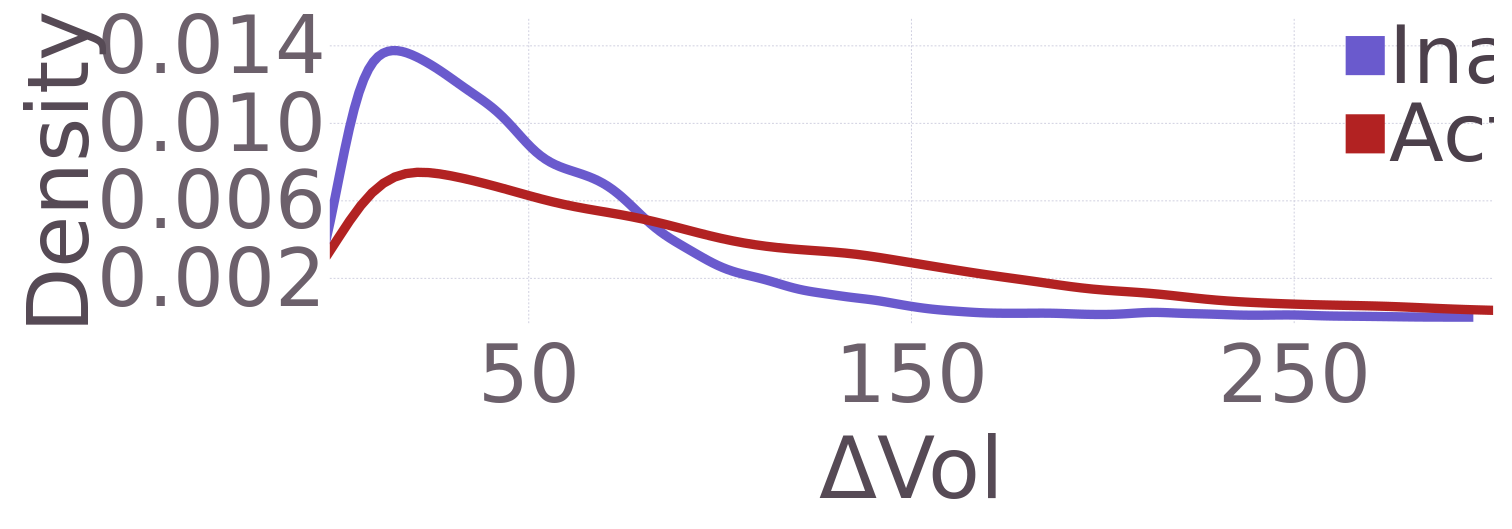

In [47]:
pdf_arr_vol = plot(df_arr_vol, x="ΔVol", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.yticks(ticks = collect(2e-3:4e-3:14e-3), orientation = :horizontal),
    Guide.xticks(ticks = collect(50:100:250), orientation = :horizontal),
    Coord.cartesian(xmin = -0.0005, xmax = 300, ymax = .015),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.87w, -0.38h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

### 2do método

In [15]:
# Vec 1
tmp = readdlm(string(home_rtdos, "der_im_1"))
der_im_1 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "der_am_1"))
der_am_1 = reshape(tmp, length(tmp))

df_vol_vec1 = DataFrame(ΔVol = [der_im_1 ; der_am_1],
    Conformer = [ fill("IM", length(der_im_1)) ; fill("AM", length(der_am_1)) ]);

# Vec 2
tmp = readdlm(string(home_rtdos, "der_im_2"))
der_im_2 = reshape(tmp, length(tmp))
tmp = readdlm(string(home_rtdos, "der_am_2"))
der_am_2 = reshape(tmp, length(tmp))

df_vol_vec2 = DataFrame(ΔVol = [der_im_2 ; der_am_2],
    Conformer = [ fill("IM", length(der_im_2)) ; fill("AM", length(der_am_2)) ]);

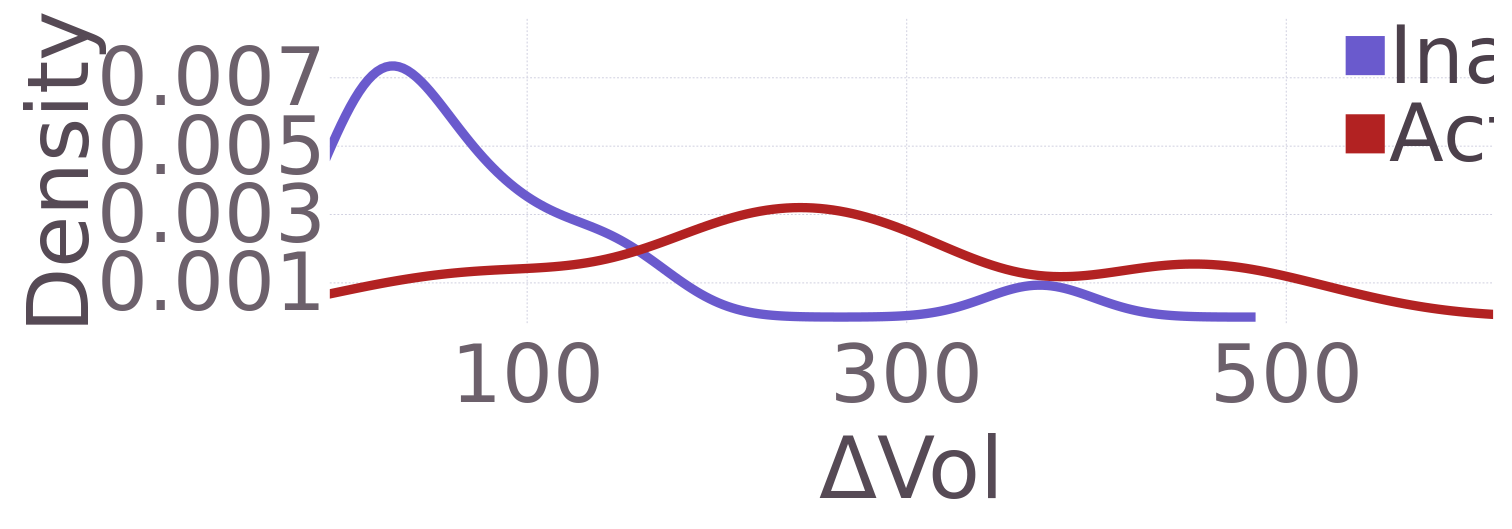

In [50]:
pdf_vol_vec1 = plot(df_vol_vec1, x="ΔVol", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.yticks(ticks = collect(1e-3:2e-3:8e-3), orientation = :horizontal),
    Guide.xticks(ticks = collect(100:200:600), orientation = :horizontal),
    Coord.cartesian(xmin = -0.0005, xmax = 605, ymax = .0085),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.87w, -0.38h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

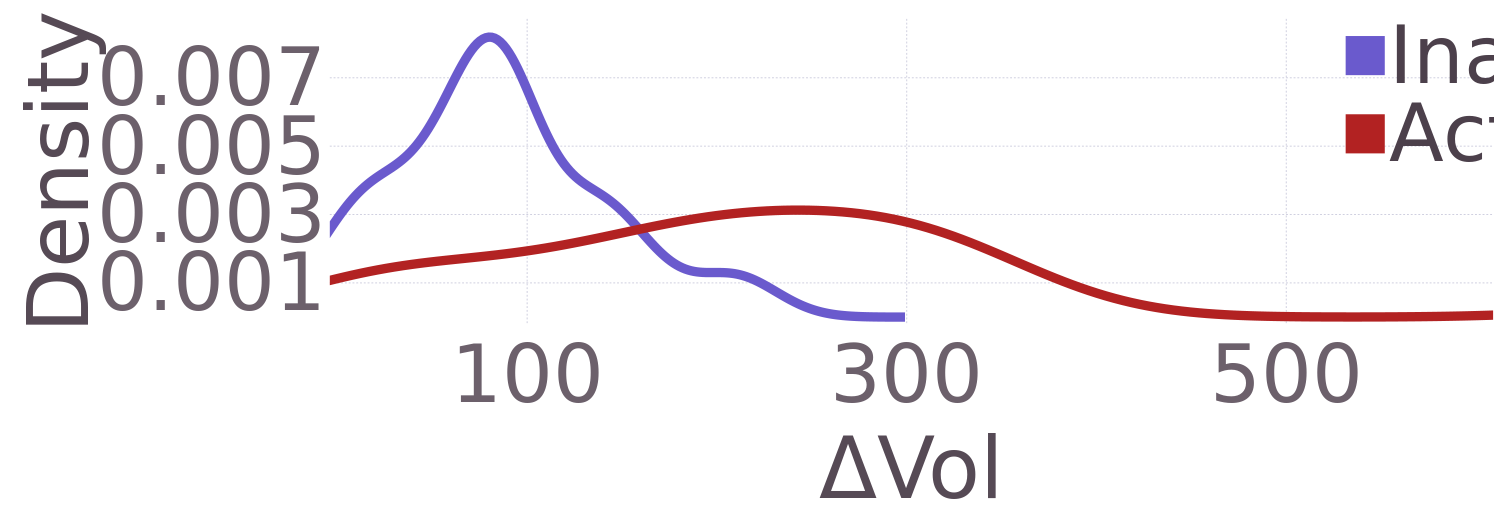

In [49]:
pdf_vol_vec2 = plot(df_vol_vec2, x="ΔVol", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    Guide.yticks(ticks = collect(1e-3:2e-3:8e-3), orientation = :horizontal),
    Guide.xticks(ticks = collect(100:200:600), orientation = :horizontal),
    Coord.cartesian(xmin = -0.0005, xmax = 605, ymax = .0085),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    Guide.colorkey(title="Conformer", pos=[0.87w, -0.38h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 1pt, grid_line_width = 0.75pt, line_width = 7pt,
        key_label_font_size = 60pt, key_title_font_size = 70pt,
        minor_label_font_size = 60pt, major_label_font_size = 64pt))

# Guardo

In [19]:
draw(PNG(string(home_plots, "bfacs_mean.png"), 120cm, 40cm), pdf_mean_bfacs)
draw(PNG(string(home_plots, "bfacs_cor.png"), 120cm, 40cm), pdf_cor_bf)

draw(PNG(string(home_plots, "pnu_im.png"), 120cm, 40cm), pdf_pnu_im)
draw(PNG(string(home_plots, "pnu_am.png"), 120cm, 40cm), pdf_pnu_am)

draw(PNG(string(home_plots, "zeta.png"), 120cm, 40cm), pdf_zeta)
draw(PNG(string(home_plots, "nd.png"), 120cm, 40cm), pdf_nd)

draw(PNG(string(home_plots, "svd_1.png"), 120cm, 40cm), pdf_svd_1)
draw(PNG(string(home_plots, "svd_2.png"), 120cm, 40cm), pdf_svd_2)
draw(PNG(string(home_plots, "svd_3.png"), 120cm, 40cm), pdf_svd_3)

draw(PNG(string(home_plots, "rg_svd1.png"), 120cm, 40cm), pdf_der_vec1)
draw(PNG(string(home_plots, "rg_svd2.png"), 120cm, 40cm), pdf_der_vec2)

draw(PNG(string(home_plots, "vol_arr.png"), 120cm, 40cm), pdf_arr_vol)
draw(PNG(string(home_plots, "vol_vec1.png"), 120cm, 40cm), pdf_vol_vec1)
draw(PNG(string(home_plots, "vol_vec2.png"), 120cm, 40cm), pdf_vol_vec2)